In [183]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from scripts import save_csv

Question #3

I used https://stackoverflow.com/questions/63564845/contour-plots-for-multivariate-gaussian to help learn how to plot the isocontours

part 1:


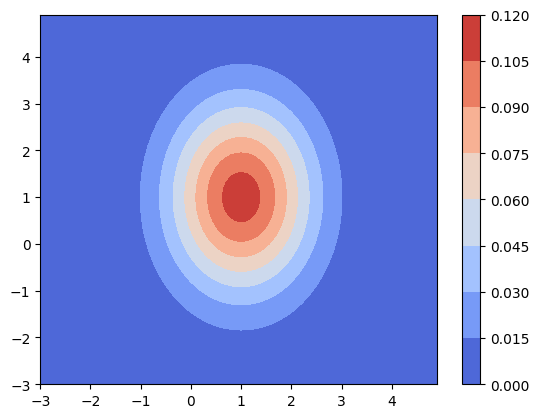

In [184]:
#3 Part 1
x, y = np.mgrid[-3:5:.1, -3:5:.1]
rv = multivariate_normal([1, 1], [[1, 0], [0, 2]])
data = np.dstack((x, y))
z = rv.pdf(data)
print("part 1:")
plt.contourf(x, y, z, cmap='coolwarm')
plt.colorbar()
plt.show()


part 2:


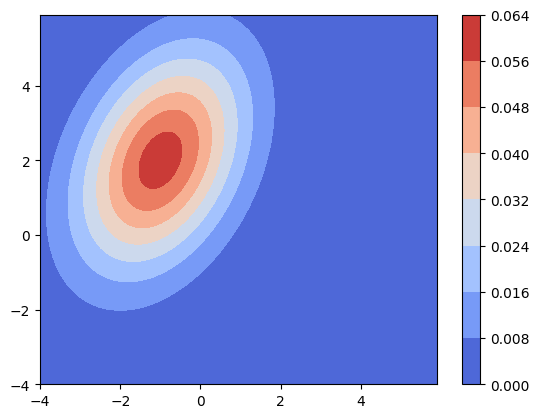

In [185]:
#3 Part 2
x, y = np.mgrid[-4:6:.1, -4:6:.1]
rv = multivariate_normal([-1, 2], [[2, 1], [1, 4]])
data = np.dstack((x, y))
z = rv.pdf(data)
print("part 2:")
plt.contourf(x, y, z, cmap='coolwarm')
plt.colorbar()
plt.show()

part 3:


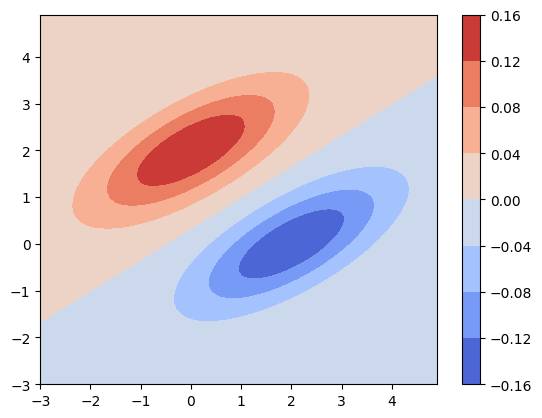

In [186]:
#3 Part 3
x, y = np.mgrid[-3:5:.1, -3:5:.1]
rv1 = multivariate_normal([0, 2], [[2, 1], [1, 1]])
rv2 = multivariate_normal([2, 0], [[2, 1], [1, 1]])
data = np.dstack((x, y))
z1 = rv1.pdf(data) 
z2 = rv2.pdf(data)
z = z1 - z2
print("part 3:")
plt.contourf(x, y, z, cmap='coolwarm')
plt.colorbar()
plt.show()



part 4:


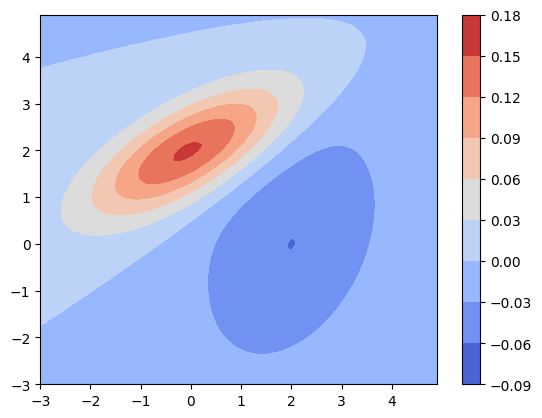

In [187]:
#3 part 4
x, y = np.mgrid[-3:5:.1, -3:5:.1]
rv1 = multivariate_normal([0, 2], [[2, 1], [1, 1]])
rv2 = multivariate_normal([2, 0], [[2, 1], [1, 4]])
data = np.dstack((x, y))
z1 = rv1.pdf(data) 
z2 = rv2.pdf(data)
z = z1 - z2
print("part 4:")
plt.contourf(x, y, z, cmap='coolwarm')
plt.colorbar()
plt.show()



part 5:


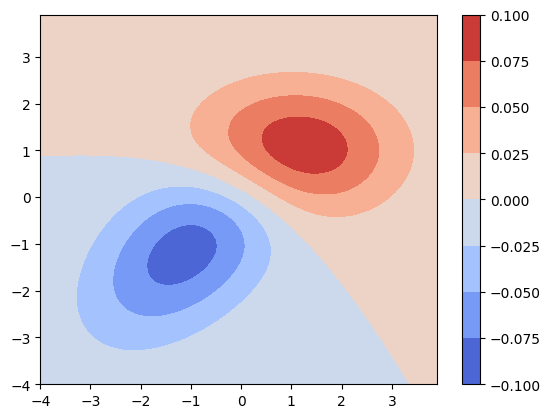

In [188]:
#3 part 5
x, y = np.mgrid[-4:4:.1, -4:4:.1]
rv1 = multivariate_normal([1, 1], [[2, 0], [0, 1]])
rv2 = multivariate_normal([-1, -1], [[2, 1], [1, 2]])
data = np.dstack((x, y))
z1 = rv1.pdf(data) 
z2 = rv2.pdf(data)
z = z1 - z2
print("part 5:")
plt.contourf(x, y, z, cmap='coolwarm')
plt.colorbar()
plt.show()



Question #4

I used https://stackoverflow.com/questions/42281966/how-to-plot-vectors-in-python-using-matplotlib and https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.quiver.html for references and help with the plotting, especially for part 4

Part 1:
Mean: [2.4863755  4.78454024]


Part 2:
2x2 Covariance Matrix: 
 [[9.65907809 4.56517459]
 [4.56517459 6.43869421]]


Part 3:
Eigenvalues:
 [12.88970603  3.20806627] 
 Eigenvectors:
 [[ 0.81628057 -0.57765563]
 [ 0.57765563  0.81628057]]


Part 4:


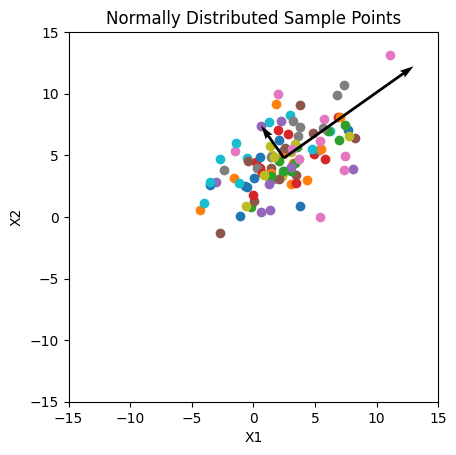



Part 5:


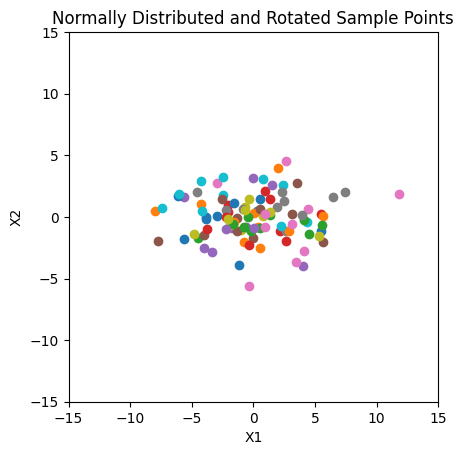

In [189]:
#Settting Up
np.random.seed(14)
X1 = np.random.normal(3, 3, 100)
X2_incomplete = np.random.normal(4, 2, 100)
points = np.array([[X1[i], 0.5 * X1[i] + X2_incomplete[i]] for i in range(100)])

#Part 1
mean = np.mean(points, axis=0)
print("Part 1:")
print(f"Mean: {mean}")
print("\n")

#Part 2
cov = np.cov(points.T)
print("Part 2:")
print(f"2x2 Covariance Matrix: \n {cov}")
print("\n")

#Part 3
eig_vals, eig_vectors = np.linalg.eig(cov)
print("Part 3:")
print(f"Eigenvalues:\n {eig_vals} \n Eigenvectors:\n {eig_vectors}")
print("\n")

#Part 4
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Normally Distributed Sample Points")
plt.xlim(-15, 15)
plt.ylim(-15, 15)
plt.gca().set_aspect('equal', adjustable='box')
for x in points:
    plt.scatter(x[0], x[1])
x_origins = [mean[0], mean[0]]
y_origins = [mean[1], mean[1]]
eig_vectors_x = [eig_vectors[0][0] * eig_vals[0], eig_vectors[0][1] * eig_vals[1]]
eig_vectors_y = [eig_vectors[1][0] * eig_vals[0], eig_vectors[1][1] * eig_vals[1]]
plt.quiver(x_origins, y_origins, eig_vectors_x, eig_vectors_y, angles='xy', scale_units='xy', scale=1)
print("Part 4:")
plt.show()
print("\n")

#Part 5
U_T = eig_vectors.T
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Normally Distributed and Rotated Sample Points")
plt.xlim(-15, 15)
plt.ylim(-15, 15)
plt.gca().set_aspect('equal', adjustable='box')
for x in points:
    point = U_T @ [x[0] - mean[0], x[1] - mean[1]]
    plt.scatter(point[0], point[1])
print("Part 5:")
plt.show()
print("\n")    

Question #8

In [190]:
import numpy as np 
import scipy
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
import math
import pandas as pd

Part 1

In [191]:
mnist_data = np.load("/Users/Dom/Desktop/CS189/hw3/data/mnist-data-hw3.npz")
spam_data = np.load(f"/Users/Dom/Desktop/CS189/hw3/data/spam-data-hw3.npz")
spam_test = spam_data["test_data"]
spam_train_data = spam_data["training_data"]
spam_train_labels = spam_data["training_labels"]

In [192]:
mnist_training_data = mnist_data["training_data"]
mnist_training_labels = mnist_data["training_labels"]

#Part 1

def create_gauss(training_data, training_labels):
    data = training_data

    for i in range(training_data.shape[0]):
        data[i] = data[i]/np.linalg.norm(data[i])
        
    all_labels = np.unique(training_labels)

    priors = [0] * len(all_labels)

    mnist_separated = [[] for _ in range(len(all_labels))]
    for label in range(training_data.shape[0]):
        train_label = training_labels[label]
        mnist_separated[train_label].append(data[label])

    mnist_mean_cov = [None] * len(all_labels)

    for i in all_labels:
        mean = np.mean(mnist_separated[i], axis=0) 
        cov = np.cov(mnist_separated[i], rowvar=False)
        priors[i] = len(mnist_separated[i])/training_data.shape[0]
        mnist_mean_cov[i] = (mean, cov)


    return all_labels, mnist_separated, mnist_mean_cov, priors




Part 2

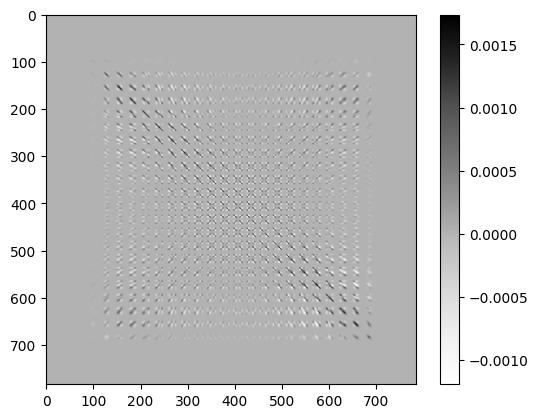

In [193]:
mnist_training_data = mnist_data["training_data"]
mnist_training_labels = mnist_data["training_labels"]

data = np.reshape(np.squeeze(mnist_training_data, axis = 1), (mnist_training_data.shape[0], 784))

all_labels, mnist_separated, mnist_mean_cov, priors = create_gauss(data, mnist_training_labels)
cov_digit_0 = mnist_mean_cov[0][1]
plt.imshow(cov_digit_0, cmap="Greys") 
plt.colorbar() 
plt.show()


The colors along diagonals seem to have much stronger black colors as compared to colors that are not on the diagonals. Off diagonals are more grey/white, which means their covariance with one another is much weaker. This means that pixels adjacent to one another (the diagonal elements) have much stronger correlation because higher covariance means higher correlation. 

Part 3

In [194]:
def partition_mnist(data, labels):

    data = np.reshape(np.squeeze(data, axis = 1), (60000, 784))

    np.random.seed(14)
    permuted_data = np.random.permutation(data)

    np.random.seed(14)
    permuted_labels = np.random.permutation(labels)

    valiadation_data = permuted_data[:10000]
    training_data = permuted_data[10000:]

    valiadation_labels = permuted_labels[:10000]
    training_labels = permuted_labels[10000:]

    return training_data, training_labels, valiadation_data, valiadation_labels

In [195]:
training_data, training_labels, valiadation_data, valiadation_labels = partition_mnist(mnist_training_data, mnist_training_labels)
numsamples  = [100, 200, 500, 1000, 2000, 5000, 10000, 30000, 50000]

def calc_sigma(train_data, labels):
    lda_sigma = np.zeros((784,784))
    all_labels, mnist_separated, mnist_mean_cov, priors = create_gauss(train_data, labels)
    for label in all_labels:
        cov = mnist_mean_cov[label][1] * len(mnist_separated[label])
        lda_sigma += cov
    lda_sigma = lda_sigma/train_data.shape[0]
    return lda_sigma, mnist_mean_cov, priors

def make_nonsingular(sigma):
    eigvals = np.linalg.eigvals(sigma)
    min_eigval =  min(eigvals)
    if min_eigval > 0:
        return sigma
    else:
        return (-min_eigval + .0001) * np.eye(784) + sigma



Part A

In [196]:
lda_answers = []
lda_err = []

for data in numsamples:
    sigma, mean_cov, priors = calc_sigma(training_data[:data], training_labels[:data])
    sigma = make_nonsingular(sigma)
    lst = []
    for lab in np.unique(training_labels[:data]):
        Q = scipy.stats.multivariate_normal.logpdf(valiadation_data, cov=sigma, mean=mean_cov[lab][0]) + math.log(priors[lab])
        lst.append(Q)
    iteration_answer = np.argmax(lst, axis=0)
    lda_answers.append(iteration_answer)

for prediction in lda_answers:
    lda_err.append(1 - np.sum(prediction == valiadation_labels)/len(valiadation_labels))

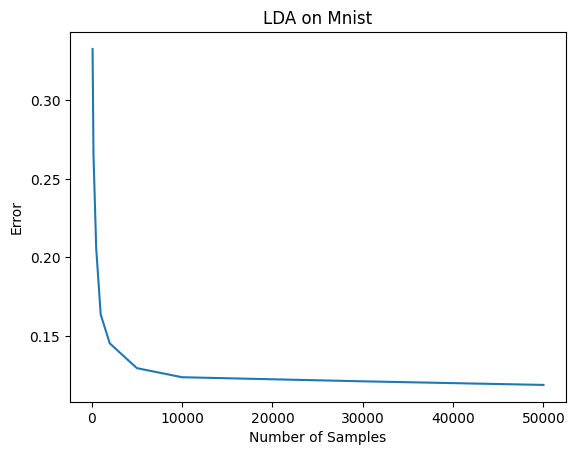

In [197]:
plt.plot(numsamples, lda_err) 
plt.xlabel("Number of Samples") 
plt.ylabel("Error") 
plt.title("LDA on Mnist") 
plt.show() 


Part B

In [198]:
qda_answers = []
qda_err = []

for data in numsamples:
    sigma, mean_cov, priors = calc_sigma(training_data[:data], training_labels[:data])
    newcov = []
    for i in range(10):
        newcov.append(make_nonsingular(mean_cov[i][1]))
    lst = []
    for lab in np.unique(training_labels[:data]):
        Q = scipy.stats.multivariate_normal.logpdf(valiadation_data, cov=newcov[lab], mean=mean_cov[lab][0]) + math.log(priors[lab])
        lst.append(Q)
    iteration_answer = np.argmax(lst, axis=0)
    qda_answers.append(iteration_answer)

for prediction in qda_answers:
    qda_err.append(1 - np.sum(prediction == valiadation_labels)/len(valiadation_labels))


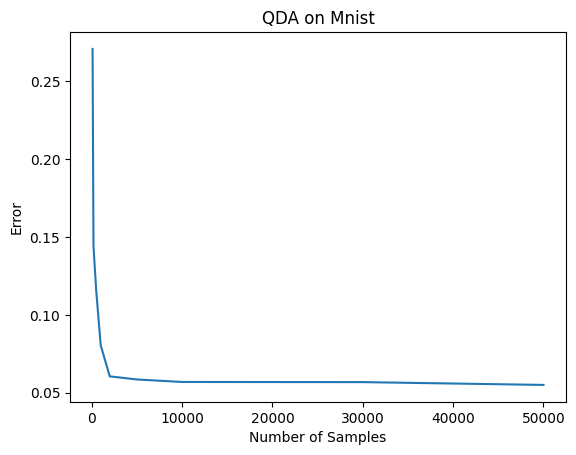

In [199]:
plt.plot(numsamples, qda_err) 
plt.xlabel("Number of Samples") 
plt.ylabel("Error") 
plt.title("QDA on Mnist") 
plt.show() 

Part C

QDA performed much better because it allows more freedom of the decision boundary. It uses different covariance matrices for each sample point instead of one pooled covaraince matrix, which allows us to better fit and esitmate the data.   

Part D

In [200]:
num_of_each = [0] * 10
lda_digit_errors = []
qda_digit_errors = []


for i in range(10):
    lda_digit_errors.append([])
    qda_digit_errors.append([])



for label in valiadation_labels:
    num_of_each[label] += 1


for test in range(len(numsamples)):
    for curlabel in range(10):
        correct_lda = 0
        correct_qda = 0
        for pred in range(10000):
            num_lda =  lda_answers[test][pred]
            num_qda =  qda_answers[test][pred]
            true = valiadation_labels[pred]
            if true == curlabel and num_lda == true:
                correct_lda += 1 
            if true == curlabel and num_qda == true:
                correct_qda += 1 
        lda_digit_errors[curlabel].append(1 - correct_lda/num_of_each[curlabel])
        qda_digit_errors[curlabel].append(1 - correct_qda/num_of_each[curlabel])



<function matplotlib.pyplot.show(close=None, block=None)>

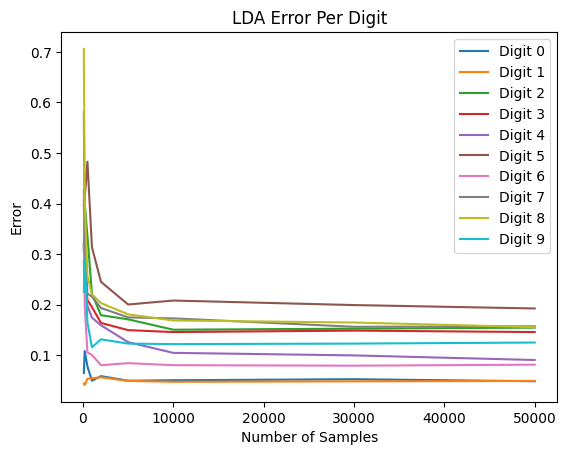

In [201]:
for i in range(10):
    plt.plot(numsamples, lda_digit_errors[i], label = f"Digit {i}")

plt.xlabel("Number of Samples") 
plt.ylabel("Error") 
plt.title("LDA Error Per Digit") 
plt.legend()
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

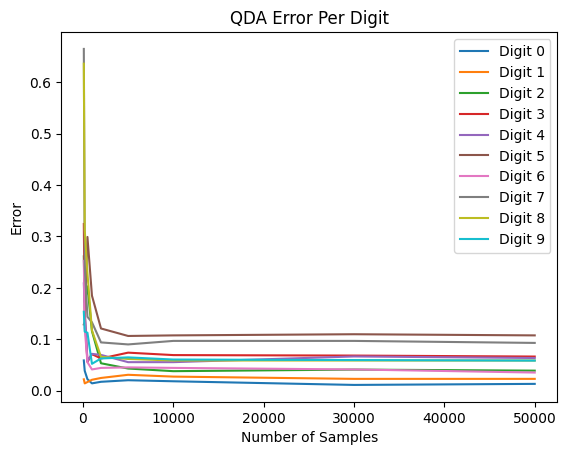

In [202]:
for i in range(10):
    plt.plot(numsamples, qda_digit_errors[i], label = f"Digit {i}")

plt.xlabel("Number of Samples") 
plt.ylabel("Error") 
plt.title("QDA Error Per Digit") 
plt.legend()
plt.show

For both QDA and LDA, 1 and 0 were the easiest to classify. I believe this is the case because one and zero have very little pixel overlap with the other numbers, and since they are much simpler shapes to draw compared to the other numbers, the data for these two numbers is more likely to be more uniform and consistent than the data for all of the other numbrers.

Part 4

In [203]:
def results_to_csv_mnist(y_test):
    y_test = y_test.astype(int)
    df = pd.DataFrame({'Category': y_test})
    df.index += 1 # Ensures that the index starts at 1
    df.to_csv('mnist_submission.csv', index_label='Id')

mnist_test_data_unprocessed = mnist_data["test_data"]
mnist_qda_answers = []
data_final = np.reshape(np.squeeze(mnist_training_data, axis = 1), (mnist_training_data.shape[0], 784))
mnist_test_data = np.reshape(np.squeeze(mnist_test_data_unprocessed, axis = 1), (mnist_test_data_unprocessed.shape[0], 784))

for data in [60000]:
    sigma, mean_cov, priors = calc_sigma(data_final, mnist_training_labels)
    newcov = []
    for i in range(10):
        newcov.append(make_nonsingular(mean_cov[i][1]))
    lst = []
    for lab in np.unique(training_labels[:data]):
        Q = scipy.stats.multivariate_normal.logpdf(mnist_test_data, cov=newcov[lab], mean=mean_cov[lab][0]) + math.log(priors[lab])
        lst.append(Q)
    iteration_answer = np.argmax(lst, axis=0)
    mnist_qda_answers.append(iteration_answer)

results_to_csv_mnist(mnist_qda_answers[0])

#.872 Dominic Ventimiglia 


Part 5

In [204]:
def create_gauss_spam(training_data, training_labels):
    data = training_data
        
    all_labels = np.unique(training_labels)

    priors = [0] * len(all_labels)

    mnist_separated = [[] for _ in range(len(all_labels))]
    for label in range(training_data.shape[0]):
        train_label = training_labels[label]
        mnist_separated[train_label].append(data[label])

    mnist_mean_cov = [None] * len(all_labels)

    for i in all_labels:
        mean = np.mean(mnist_separated[i], axis=0) 
        cov = np.cov(mnist_separated[i], rowvar=False)
        priors[i] = len(mnist_separated[i])/training_data.shape[0]
        mnist_mean_cov[i] = (mean, cov)


    return all_labels, mnist_separated, mnist_mean_cov, priors

def calc_sigma_spam(train_data, labels):
    lda_sigma = np.zeros((32,32))
    all_labels, mnist_separated, mnist_mean_cov, priors = create_gauss_spam(train_data, labels)
    for label in all_labels:
        cov = mnist_mean_cov[label][1] * len(mnist_separated[label])
        lda_sigma += cov
    lda_sigma = lda_sigma/train_data.shape[0]
    return lda_sigma, mnist_mean_cov, priors

def make_nonsingular_spam(sigma):
    eigvals = np.linalg.eigvals(sigma)
    min_eigval =  min(eigvals)
    if min_eigval > 0:
        return sigma
    else:
        return (-min_eigval + .0001) * np.eye(32) + sigma

In [205]:
spam_lda_answers = []
spam_lda_err = []

for data in [4172]:
    sigma, mean_cov, priors = calc_sigma_spam(spam_train_data[:3000], spam_train_labels[:3000])
    sigma = make_nonsingular_spam(sigma)
    lst = []
    for lab in np.unique(spam_train_labels[:3000]):
        Q = scipy.stats.multivariate_normal.logpdf(spam_train_data[3000:], cov=sigma, mean=mean_cov[lab][0]) + math.log(priors[lab])
        lst.append(Q)
    iteration_answer = np.argmax(lst, axis=0)
    spam_lda_answers.append(iteration_answer)

for prediction in spam_lda_answers:
    spam_lda_err.append(1 - np.sum(prediction == spam_train_labels[3000:])/len(spam_train_labels[3000:]))

print(spam_lda_err)


spam_qda_answers = []
spam_qda_err = []

for data in [4172]:
    sigma, mean_cov, priors = calc_sigma_spam(spam_train_data[:3000], spam_train_labels[:3000])
    newcov = []
    for i in range(2):
        newcov.append(make_nonsingular_spam(mean_cov[i][1]))
    lst = []
    for lab in np.unique(spam_train_labels[:3000]):
        Q = scipy.stats.multivariate_normal.logpdf(spam_train_data[3000:], cov=newcov[lab], mean=mean_cov[lab][0]) + math.log(priors[lab])
        lst.append(Q)
    iteration_answer = np.argmax(lst, axis=0)
    spam_qda_answers.append(iteration_answer)

for prediction in spam_qda_answers:
    spam_qda_err.append(1 - np.sum(prediction == spam_train_labels[3000:])/len(spam_train_labels[3000:]))

print(spam_qda_err)

[0.030716723549488067]
[0.03412969283276446]


In [206]:
def results_to_csv_spam(y_test):
    y_test = y_test.astype(int)
    df = pd.DataFrame({'Category': y_test})
    df.index += 1 # Ensures that the index starts at 1
    df.to_csv('spam_submission.csv', index_label='Id')

spam_lda_answers_sub = []

for data in [4172]:
    sigma, mean_cov, priors = calc_sigma_spam(spam_train_data, spam_train_labels)
    sigma = make_nonsingular_spam(sigma)
    lst = []
    for lab in np.unique(spam_train_labels):
        Q = scipy.stats.multivariate_normal.logpdf(spam_test, cov=sigma, mean=mean_cov[lab][0]) + math.log(priors[lab])
        lst.append(Q)
    iteration_answer = np.argmax(lst, axis=0)
    spam_lda_answers_sub.append(iteration_answer)

results_to_csv_spam(spam_lda_answers_sub[0])

#0.784 Dominic Ventimiglia